#Car price prediction project 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv('/content/car.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape


(205, 26)

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.drop_duplicates()
df.shape

(205, 26)

###Creating head map for correlation matrix, to select only highly correlated features

<ipython-input-49-bc343708ae2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


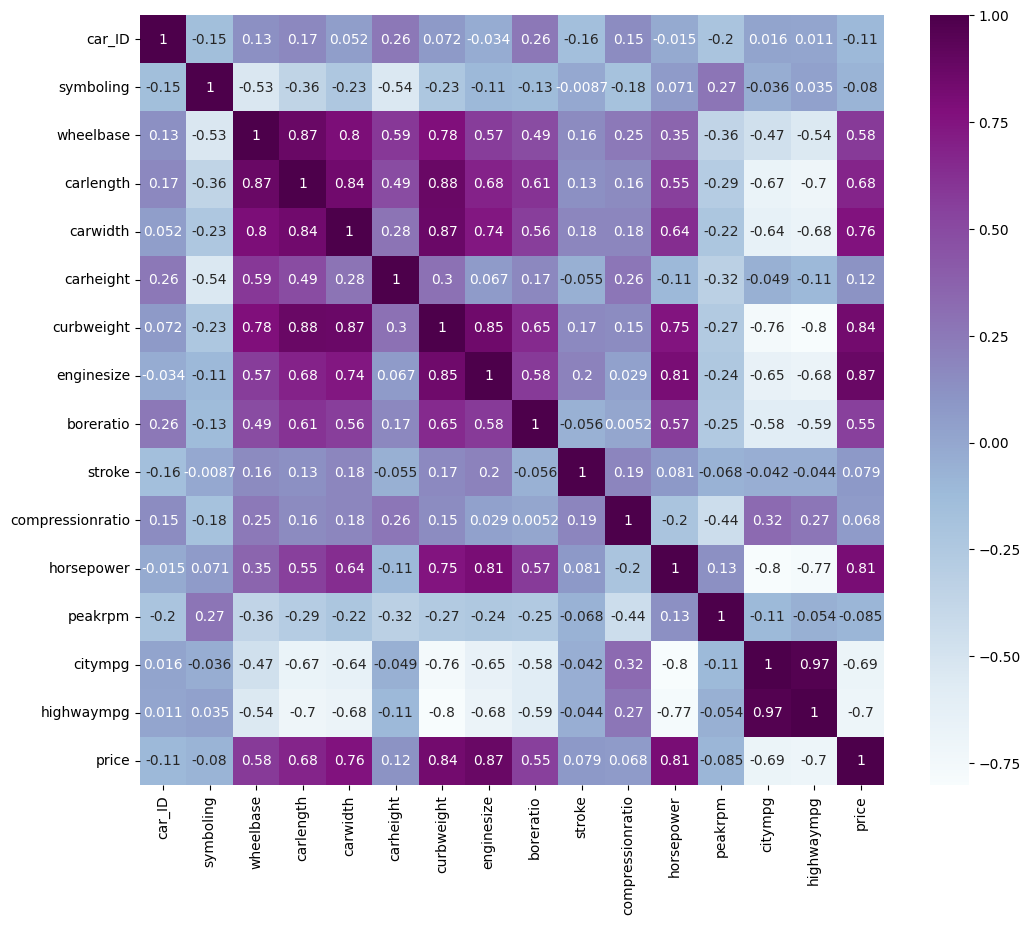

In [ ]:
plt.figure(figsize=(12,10))
cor_mat = df.corr()
sns.heatmap(cor_mat, annot=True, cmap= 'BuPu')
plt.show()

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
Y = df['price']
X = df.drop(['car_ID','symboling','stroke','compressionratio','peakrpm','price'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=0)

In [ ]:
#one hot encoder for categorical variables
ohe = OneHotEncoder()
ohe.fit(X[['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']])

OneHotEncoder()

In [ ]:

col_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_),['CarName','fueltype','aspiration','doornumber','carbody','drivewheel',
                                                      'enginelocation','enginetype','cylindernumber','fuelsystem']),remainder='passthrough')

In [ ]:
model = LinearRegression()

In [ ]:
#creating a pipe line with onehotencoder and model
pipe = make_pipeline(col_trans, model)


In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4',...
                                                                            array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
                                                                            array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object),
                                                                            array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype=object)]),
                                                  ['CarName', 'fueltype',
                                                   'aspiration', 'doornumber',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem'])])),
                ('linearregression', LinearRegression())])

###Model Evaluation

In [ ]:
#checking the accuracy of the model
scores = []
for i in range(100):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=i)
  model = LinearRegression()
  pipe = make_pipeline(col_trans, model)
  pipe.fit(x_train, y_train)
  y_pred= pipe.predict(x_test)
  scores.append(r2_score(y_test,y_pred))

In [ ]:
np.argmax(scores)

58

In [ ]:
print("The R2 score : ")
scores[np.argmax(scores)]

The R2 score : 


0.8695798325492817